In [39]:
!pip install plotly

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [41]:
df=pd.read_csv("C:/Users/Admin/Downloads\covid_19_clean_complete (1).csv",parse_dates=["Date"])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8432 non-null   object        
 1   Country/Region  19220 non-null  object        
 2   Lat             19220 non-null  float64       
 3   Long            19220 non-null  float64       
 4   Date            19220 non-null  datetime64[ns]
 5   Confirmed       19219 non-null  float64       
 6   Deaths          19219 non-null  float64       
 7   Recovered       19219 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB


In [43]:
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [44]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat",
                  "Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

In [45]:
df

state                country      lat      long       date  confirmed  \
0       NaN               Thailand  15.0000  101.0000 2020-01-22        2.0   
1       NaN                  Japan  36.0000  138.0000 2020-01-22        2.0   
2       NaN              Singapore   1.2833  103.8333 2020-01-22        0.0   
3       NaN                  Nepal  28.1667   84.2500 2020-01-22        0.0   
4       NaN               Malaysia   2.5000  112.5000 2020-01-22        0.0   
...     ...                    ...      ...       ...        ...        ...   
19215   NaN                 Jersey  49.1900   -2.1100 2020-03-23        0.0   
19216   NaN            Puerto Rico  18.2000  -66.5000 2020-03-23        0.0   
19217   NaN  Republic of the Congo  -1.4400   15.5560 2020-03-23        0.0   
19218   NaN            The Bahamas  24.2500  -76.0000 2020-03-23        0.0   
19219   NaN             The Gambia  13.4667  -16.6000 2020-03-23        0.0   

       deaths  recovered  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0  
...       ...        ...  
19215     0.0        0.0  
19216     1.0        0.0  
19217     0.0        0.0  
19218     0.0        0.0  
19219     0.0        0.0  

[19220 rows x 8 columns]

In [46]:
df["active"]=df["confirmed"]-df["deaths"]-df["recovered"]

In [47]:
df.iloc[100:,:]

state                country      lat      long       date  \
100          California                     US  36.1162 -119.6816 2020-01-22   
101       Massachusetts                     US  42.2302  -71.5301 2020-01-22   
102    Diamond Princess                     US  35.4437  139.6380 2020-01-22   
103      Grand Princess                     US  37.6489 -122.6655 2020-01-22   
104             Georgia                     US  33.0406  -83.6431 2020-01-22   
...                 ...                    ...      ...       ...        ...   
19215               NaN                 Jersey  49.1900   -2.1100 2020-03-23   
19216               NaN            Puerto Rico  18.2000  -66.5000 2020-03-23   
19217               NaN  Republic of the Congo  -1.4400   15.5560 2020-03-23   
19218               NaN            The Bahamas  24.2500  -76.0000 2020-03-23   
19219               NaN             The Gambia  13.4667  -16.6000 2020-03-23   

       confirmed  deaths  recovered  active  
100          0.0     0.0        0.0     0.0  
101          0.0     0.0        0.0     0.0  
102          0.0     0.0        0.0     0.0  
103          0.0     0.0        0.0     0.0  
104          0.0     0.0        0.0     0.0  
...          ...     ...        ...     ...  
19215        0.0     0.0        0.0     0.0  
19216        0.0     1.0        0.0    -1.0  
19217        0.0     0.0        0.0     0.0  
19218        0.0     0.0        0.0     0.0  
19219        0.0     0.0        0.0     0.0  

[19120 rows x 9 columns]

In [48]:
df

state                country      lat      long       date  confirmed  \
0       NaN               Thailand  15.0000  101.0000 2020-01-22        2.0   
1       NaN                  Japan  36.0000  138.0000 2020-01-22        2.0   
2       NaN              Singapore   1.2833  103.8333 2020-01-22        0.0   
3       NaN                  Nepal  28.1667   84.2500 2020-01-22        0.0   
4       NaN               Malaysia   2.5000  112.5000 2020-01-22        0.0   
...     ...                    ...      ...       ...        ...        ...   
19215   NaN                 Jersey  49.1900   -2.1100 2020-03-23        0.0   
19216   NaN            Puerto Rico  18.2000  -66.5000 2020-03-23        0.0   
19217   NaN  Republic of the Congo  -1.4400   15.5560 2020-03-23        0.0   
19218   NaN            The Bahamas  24.2500  -76.0000 2020-03-23        0.0   
19219   NaN             The Gambia  13.4667  -16.6000 2020-03-23        0.0   

       deaths  recovered  active  
0         0.0        0.0     2.0  
1         0.0        0.0     2.0  
2         0.0        0.0     0.0  
3         0.0        0.0     0.0  
4         0.0        0.0     0.0  
...       ...        ...     ...  
19215     0.0        0.0     0.0  
19216     1.0        0.0    -1.0  
19217     0.0        0.0     0.0  
19218     0.0        0.0     0.0  
19219     0.0        0.0     0.0  

[19220 rows x 9 columns]

In [49]:
top=df[df["date"]==df["date"].max()]

In [50]:
top.tail()

state                country      lat    long       date  confirmed  \
19215   NaN                 Jersey  49.1900  -2.110 2020-03-23        0.0   
19216   NaN            Puerto Rico  18.2000 -66.500 2020-03-23        0.0   
19217   NaN  Republic of the Congo  -1.4400  15.556 2020-03-23        0.0   
19218   NaN            The Bahamas  24.2500 -76.000 2020-03-23        0.0   
19219   NaN             The Gambia  13.4667 -16.600 2020-03-23        0.0   

       deaths  recovered  active  
19215     0.0        0.0     0.0  
19216     1.0        0.0    -1.0  
19217     0.0        0.0     0.0  
19218     0.0        0.0     0.0  
19219     0.0        0.0     0.0

In [51]:
world=top.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()

In [52]:
world.head(67)


country  confirmed   active  deaths
0   Afghanistan       40.0     38.0     1.0
1       Albania       89.0     85.0     2.0
2       Algeria      201.0    119.0    17.0
3       Andorra      113.0    111.0     1.0
4        Angola        2.0      2.0     0.0
..          ...        ...      ...     ...
62  Gambia, The        1.0      1.0     0.0
63      Georgia       54.0     51.0     0.0
64      Germany    24873.0  24513.0    94.0
65        Ghana       24.0     23.0     1.0
66       Greece      624.0    590.0    15.0

[67 rows x 4 columns]

In [53]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    183 non-null    object 
 1   confirmed  183 non-null    float64
 2   active     183 non-null    float64
 3   deaths     183 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.8+ KB


In [55]:
#Choropleth
figure=px.choropleth(world,locations="country",locationmode="country names",color="active",hover_name="country"
                ,range_color=[1,1000],color_continuous_scale="greens",title="Contries with active cases")
figure.show()

In [56]:
#determining total confirmed cases grouped by date
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

date  confirmed
0  2020-01-22      554.0
1  2020-01-23      652.0
2  2020-01-24      939.0
3  2020-01-25     1432.0
4  2020-01-26     2113.0
..        ...        ...
57 2020-03-19   242708.0
58 2020-03-20   272166.0
59 2020-03-21   304524.0
60 2020-03-22   335955.0
61 2020-03-23   336004.0

[62 rows x 2 columns]

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

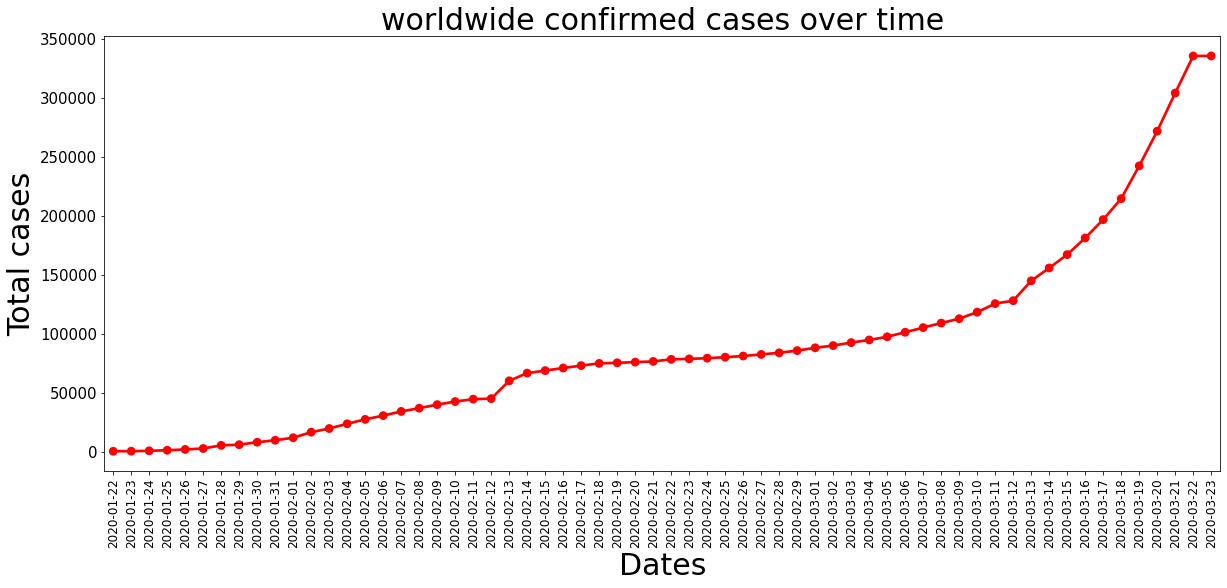

In [57]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="Total cases")

In [58]:
total_cases.date.dt.date

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
57    2020-03-19
58    2020-03-20
59    2020-03-21
60    2020-03-22
61    2020-03-23
Name: date, Length: 62, dtype: object

In [59]:
total_cases.confirmed

0        554.0
1        652.0
2        939.0
3       1432.0
4       2113.0
        ...   
57    242708.0
58    272166.0
59    304524.0
60    335955.0
61    336004.0
Name: confirmed, Length: 62, dtype: float64

In [60]:
#current top countries having most active cases
top_actives=top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

country   active
0            Italy  46638.0
1               US  32681.0
2          Germany  24513.0
3            Spain  24421.0
4           France  13170.0
5             Iran  12022.0
6      Switzerland   7016.0
7      South Korea   5884.0
8   United Kingdom   5392.0
9            China   5351.0
10     Netherlands   4034.0
11         Austria   3219.0
12         Belgium   3063.0
13          Norway   2375.0
14          Sweden   1897.0
15        Portugal   1581.0
16          Brazil   1566.0
17         Denmark   1500.0
18          Canada   1439.0
19       Australia   1219.0

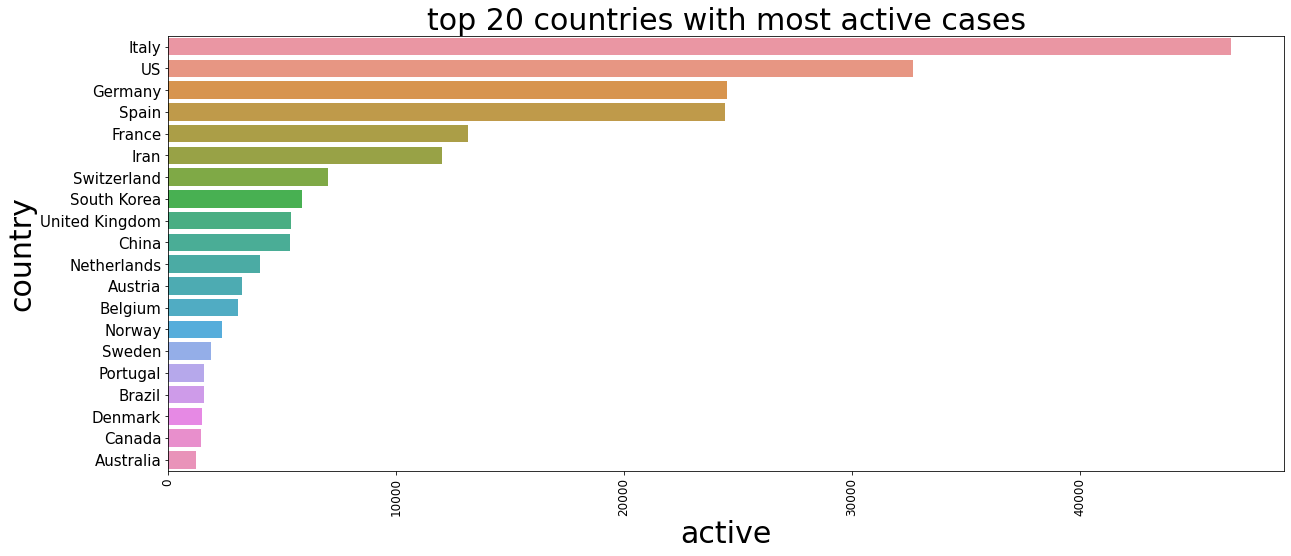

In [61]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=30)

ax=sns.barplot(x=top_actives.active,y=top_actives.country)


In [62]:
#Data of China
china=df[df.country=="China"]
china

state country      lat      long       date  confirmed  \
154             Hubei   China  30.9756  112.2707 2020-01-22      444.0   
158         Guangdong   China  23.3417  113.4244 2020-01-22       26.0   
159             Henan   China  33.8820  113.6140 2020-01-22        5.0   
160          Zhejiang   China  29.1832  120.0934 2020-01-22       10.0   
161             Hunan   China  27.6104  111.7088 2020-01-22        4.0   
...               ...     ...      ...       ...        ...        ...   
19098  Inner Mongolia   China  44.0935  113.9448 2020-03-23       75.0   
19099         Ningxia   China  37.2692  106.1655 2020-03-23       75.0   
19103         Qinghai   China  35.7452   95.9956 2020-03-23       18.0   
19104           Macau   China  22.1667  113.5500 2020-03-23       24.0   
19112           Tibet   China  31.6927   88.0924 2020-03-23        1.0   

       deaths  recovered  active  
154      17.0       28.0   399.0  
158       0.0        0.0    26.0  
159       0.0        0.0     5.0  
160       0.0        0.0    10.0  
161       0.0        0.0     4.0  
...       ...        ...     ...  
19098     1.0       74.0     0.0  
19099     0.0       75.0     0.0  
19103     0.0       18.0     0.0  
19104     0.0       10.0    14.0  
19112     0.0        1.0     0.0  

[2046 rows x 9 columns]

In [64]:
china=china.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china

date  recovered  deaths  confirmed  active
0  2020-01-22       28.0    17.0      548.0   503.0
1  2020-01-23       30.0    18.0      643.0   595.0
2  2020-01-24       36.0    26.0      920.0   858.0
3  2020-01-25       39.0    42.0     1406.0  1325.0
4  2020-01-26       49.0    56.0     2075.0  1970.0
..        ...        ...     ...        ...     ...
57 2020-03-19    70535.0  3249.0    81156.0  7372.0
58 2020-03-20    71266.0  3253.0    81250.0  6731.0
59 2020-03-21    71857.0  3259.0    81305.0  6189.0
60 2020-03-22    72362.0  3265.0    81397.0  5770.0
61 2020-03-23    72814.0  3274.0    81439.0  5351.0

[62 rows x 5 columns]

In [65]:
#data of US
us=df[df.country=="US"]
us

state country      lat      long       date  \
98                       Washington      US  47.4009 -121.4905 2020-01-22   
99                         New York      US  42.1657  -74.9481 2020-01-22   
100                      California      US  36.1162 -119.6816 2020-01-22   
101                   Massachusetts      US  42.2302  -71.5301 2020-01-22   
102                Diamond Princess      US  35.4437  139.6380 2020-01-22   
...                             ...     ...      ...       ...        ...   
19136                   Puerto Rico      US  18.2208  -66.5901 2020-03-23   
19150                          Guam      US  13.4443  144.7937 2020-03-23   
19167                Virgin Islands      US  18.3358  -64.8963 2020-03-23   
19210  United States Virgin Islands      US  18.3358  -64.8963 2020-03-23   
19211                            US      US  37.0902  -95.7129 2020-03-23   

       confirmed  deaths  recovered  active  
98           0.0     0.0        0.0     0.0  
99           0.0     0.0        0.0     0.0  
100          0.0     0.0        0.0     0.0  
101          0.0     0.0        0.0     0.0  
102          0.0     0.0        0.0     0.0  
...          ...     ...        ...     ...  
19136       23.0     1.0        0.0    22.0  
19150       27.0     1.0        0.0    26.0  
19167        NaN     NaN        NaN     NaN  
19210        6.0     0.0        0.0     6.0  
19211        1.0     0.0      178.0  -177.0  

[3596 rows x 9 columns]

In [66]:
us=us.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

date  recovered  deaths  confirmed   active
0  2020-01-22        0.0     0.0        0.0      0.0
1  2020-01-23        0.0     0.0        0.0      0.0
2  2020-01-24        0.0     0.0        0.0      0.0
3  2020-01-25        0.0     0.0        0.0      0.0
4  2020-01-26        0.0     0.0        0.0      0.0
..        ...        ...     ...        ...      ...
57 2020-03-19        0.0   200.0    13677.0  13477.0
58 2020-03-20        0.0   244.0    19100.0  18856.0
59 2020-03-21        0.0   307.0    25489.0  25182.0
60 2020-03-22        0.0   417.0    33272.0  32855.0
61 2020-03-23      178.0   417.0    33276.0  32681.0

[62 rows x 5 columns]

In [74]:
us=us.iloc[33:].reset_index().drop("index",axis=1)
us

date  recovered  deaths  confirmed   active
0  2020-02-24        0.0     0.0       36.0     36.0
1  2020-02-25        0.0     0.0       36.0     36.0
2  2020-02-26        0.0     0.0       42.0     42.0
3  2020-02-27        0.0     0.0       42.0     42.0
4  2020-02-28        0.0     0.0       44.0     44.0
5  2020-02-29        0.0     0.0       44.0     44.0
6  2020-03-01        0.0     0.0       44.0     44.0
7  2020-03-02        0.0     0.0       45.0     45.0
8  2020-03-03        0.0     0.0       45.0     45.0
9  2020-03-04        0.0     0.0       45.0     45.0
10 2020-03-05        0.0     0.0       45.0     45.0
11 2020-03-06        0.0     0.0       45.0     45.0
12 2020-03-07        0.0     0.0       66.0     66.0
13 2020-03-08        0.0     0.0       66.0     66.0
14 2020-03-09        0.0     0.0       66.0     66.0
15 2020-03-10        8.0    28.0      959.0    923.0
16 2020-03-11        8.0    36.0     1281.0   1237.0
17 2020-03-12       12.0    40.0     1663.0   1611.0
18 2020-03-13       12.0    47.0     2179.0   2120.0
19 2020-03-14       12.0    54.0     2727.0   2661.0
20 2020-03-15       12.0    63.0     3499.0   3424.0
21 2020-03-16       17.0    85.0     4632.0   4530.0
22 2020-03-17       17.0   108.0     6421.0   6296.0
23 2020-03-18        0.0   118.0     7783.0   7665.0
24 2020-03-19        0.0   200.0    13677.0  13477.0
25 2020-03-20        0.0   244.0    19100.0  18856.0
26 2020-03-21        0.0   307.0    25489.0  25182.0
27 2020-03-22        0.0   417.0    33272.0  32855.0
28 2020-03-23      178.0   417.0    33276.0  32681.0

In [75]:
us.iloc[25:]

date  recovered  deaths  confirmed   active
25 2020-03-20        0.0   244.0    19100.0  18856.0
26 2020-03-21        0.0   307.0    25489.0  25182.0
27 2020-03-22        0.0   417.0    33272.0  32855.0
28 2020-03-23      178.0   417.0    33276.0  32681.0

In [78]:
#data for italy
italy=df[df.country=="Italy"]
italy=italy.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy


date  recovered  deaths  confirmed   active
0  2020-01-31        0.0     0.0        2.0      2.0
1  2020-02-01        0.0     0.0        2.0      2.0
2  2020-02-02        0.0     0.0        2.0      2.0
3  2020-02-03        0.0     0.0        2.0      2.0
4  2020-02-04        0.0     0.0        2.0      2.0
5  2020-02-05        0.0     0.0        2.0      2.0
6  2020-02-06        0.0     0.0        2.0      2.0
7  2020-02-07        0.0     0.0        3.0      3.0
8  2020-02-08        0.0     0.0        3.0      3.0
9  2020-02-09        0.0     0.0        3.0      3.0
10 2020-02-10        0.0     0.0        3.0      3.0
11 2020-02-11        0.0     0.0        3.0      3.0
12 2020-02-12        0.0     0.0        3.0      3.0
13 2020-02-13        0.0     0.0        3.0      3.0
14 2020-02-14        0.0     0.0        3.0      3.0
15 2020-02-15        0.0     0.0        3.0      3.0
16 2020-02-16        0.0     0.0        3.0      3.0
17 2020-02-17        0.0     0.0        3.0      3.0
18 2020-02-18        0.0     0.0        3.0      3.0
19 2020-02-19        0.0     0.0        3.0      3.0
20 2020-02-20        0.0     0.0        3.0      3.0
21 2020-02-21        0.0     1.0       20.0     19.0
22 2020-02-22        1.0     2.0       62.0     59.0
23 2020-02-23        2.0     3.0      155.0    150.0
24 2020-02-24        1.0     7.0      229.0    221.0
25 2020-02-25        1.0    10.0      322.0    311.0
26 2020-02-26        3.0    12.0      453.0    438.0
27 2020-02-27       45.0    17.0      655.0    593.0
28 2020-02-28       46.0    21.0      888.0    821.0
29 2020-02-29       46.0    29.0     1128.0   1053.0
30 2020-03-01       83.0    34.0     1694.0   1577.0
31 2020-03-02      149.0    52.0     2036.0   1835.0
32 2020-03-03      160.0    79.0     2502.0   2263.0
33 2020-03-04      276.0   107.0     3089.0   2706.0
34 2020-03-05      414.0   148.0     3858.0   3296.0
35 2020-03-06      523.0   197.0     4636.0   3916.0
36 2020-03-07      589.0   233.0     5883.0   5061.0
37 2020-03-08      622.0   366.0     7375.0   6387.0
38 2020-03-09      724.0   463.0     9172.0   7985.0
39 2020-03-10      724.0   631.0    10149.0   8794.0
40 2020-03-11     1045.0   827.0    12462.0  10590.0
41 2020-03-12     1045.0   827.0    12462.0  10590.0
42 2020-03-13     1439.0  1266.0    17660.0  14955.0
43 2020-03-14     1966.0  1441.0    21157.0  17750.0
44 2020-03-15     2335.0  1809.0    24747.0  20603.0
45 2020-03-16     2749.0  2158.0    27980.0  23073.0
46 2020-03-17     2941.0  2503.0    31506.0  26062.0
47 2020-03-18     4025.0  2978.0    35713.0  28710.0
48 2020-03-19     4440.0  3405.0    41035.0  33190.0
49 2020-03-20     4440.0  4032.0    47021.0  38549.0
50 2020-03-21     6072.0  4825.0    53578.0  42681.0
51 2020-03-22     7024.0  5476.0    59138.0  46638.0
52 2020-03-23     7024.0  5476.0    59138.0  46638.0

In [84]:
italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       53 non-null     datetime64[ns]
 1   recovered  53 non-null     float64       
 2   deaths     53 non-null     float64       
 3   confirmed  53 non-null     float64       
 4   active     53 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


In [83]:
#data for India

india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

date  recovered  deaths  confirmed  active
0  2020-01-30        0.0     0.0        1.0     1.0
1  2020-01-31        0.0     0.0        1.0     1.0
2  2020-02-01        0.0     0.0        1.0     1.0
3  2020-02-02        0.0     0.0        2.0     2.0
4  2020-02-03        0.0     0.0        3.0     3.0
5  2020-02-04        0.0     0.0        3.0     3.0
6  2020-02-05        0.0     0.0        3.0     3.0
7  2020-02-06        0.0     0.0        3.0     3.0
8  2020-02-07        0.0     0.0        3.0     3.0
9  2020-02-08        0.0     0.0        3.0     3.0
10 2020-02-09        0.0     0.0        3.0     3.0
11 2020-02-10        0.0     0.0        3.0     3.0
12 2020-02-11        0.0     0.0        3.0     3.0
13 2020-02-12        0.0     0.0        3.0     3.0
14 2020-02-13        0.0     0.0        3.0     3.0
15 2020-02-14        0.0     0.0        3.0     3.0
16 2020-02-15        0.0     0.0        3.0     3.0
17 2020-02-16        3.0     0.0        3.0     0.0
18 2020-02-17        3.0     0.0        3.0     0.0
19 2020-02-18        3.0     0.0        3.0     0.0
20 2020-02-19        3.0     0.0        3.0     0.0
21 2020-02-20        3.0     0.0        3.0     0.0
22 2020-02-21        3.0     0.0        3.0     0.0
23 2020-02-22        3.0     0.0        3.0     0.0
24 2020-02-23        3.0     0.0        3.0     0.0
25 2020-02-24        3.0     0.0        3.0     0.0
26 2020-02-25        3.0     0.0        3.0     0.0
27 2020-02-26        3.0     0.0        3.0     0.0
28 2020-02-27        3.0     0.0        3.0     0.0
29 2020-02-28        3.0     0.0        3.0     0.0
30 2020-02-29        3.0     0.0        3.0     0.0
31 2020-03-01        3.0     0.0        3.0     0.0
32 2020-03-02        3.0     0.0        5.0     2.0
33 2020-03-03        3.0     0.0        5.0     2.0
34 2020-03-04        3.0     0.0       28.0    25.0
35 2020-03-05        3.0     0.0       30.0    27.0
36 2020-03-06        3.0     0.0       31.0    28.0
37 2020-03-07        3.0     0.0       34.0    31.0
38 2020-03-08        3.0     0.0       39.0    36.0
39 2020-03-09        3.0     0.0       43.0    40.0
40 2020-03-10        4.0     0.0       56.0    52.0
41 2020-03-11        4.0     1.0       62.0    57.0
42 2020-03-12        4.0     1.0       73.0    68.0
43 2020-03-13        4.0     2.0       82.0    76.0
44 2020-03-14        4.0     2.0      102.0    96.0
45 2020-03-15       13.0     2.0      113.0    98.0
46 2020-03-16       13.0     2.0      119.0   104.0
47 2020-03-17       14.0     3.0      142.0   125.0
48 2020-03-18       14.0     3.0      156.0   139.0
49 2020-03-19       15.0     4.0      194.0   175.0
50 2020-03-20       20.0     5.0      244.0   219.0
51 2020-03-21       23.0     4.0      330.0   303.0
52 2020-03-22       27.0     7.0      396.0   362.0
53 2020-03-23       27.0     7.0      396.0   362.0

In [85]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       54 non-null     datetime64[ns]
 1   recovered  54 non-null     float64       
 2   deaths     54 non-null     float64       
 3   confirmed  54 non-null     float64       
 4   active     54 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.2 KB


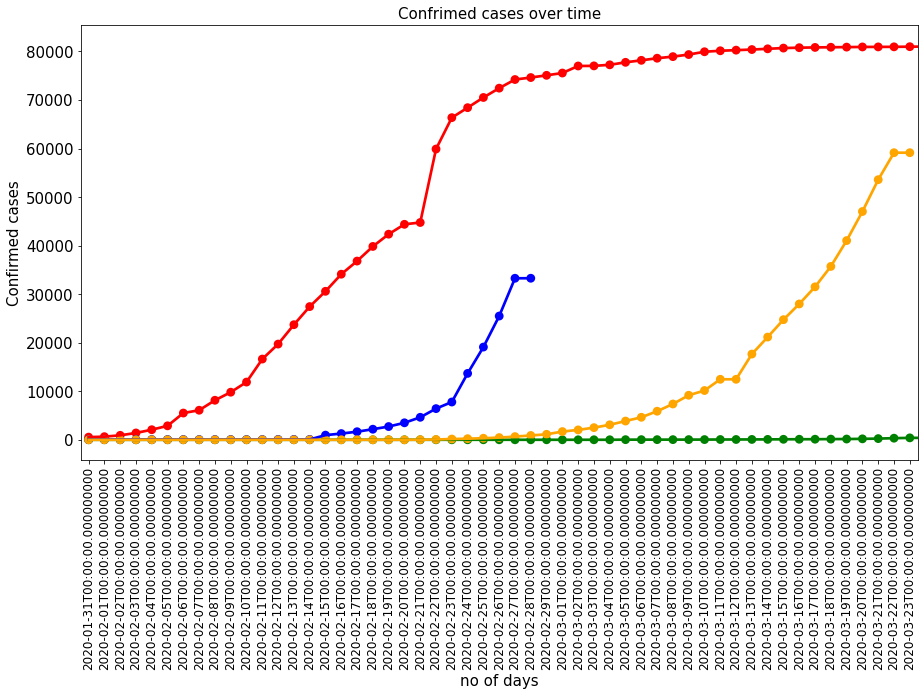

In [89]:
#confirmed
plt.figure(figsize=(15,8))
sns.pointplot(china.date,china.confirmed,color="red")
sns.pointplot(india.date,india.confirmed,color="green")
sns.pointplot(us.date,us.confirmed,color="blue")
sns.pointplot(italy.date,italy.confirmed,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("Confirmed cases",fontsize=15)
plt.title("Confrimed cases over time",fontsize=15)
plt.show()

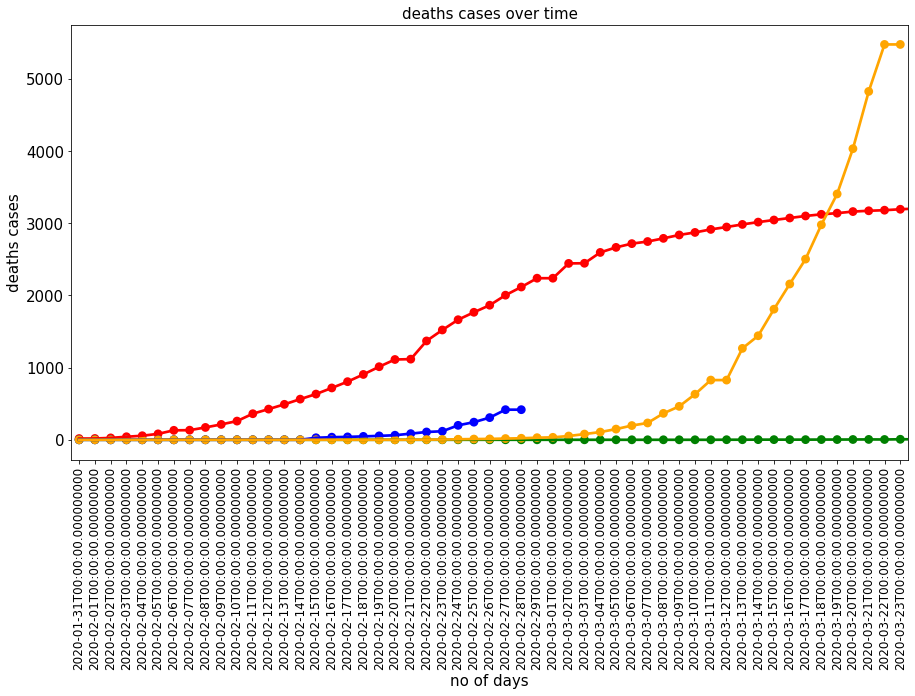

In [92]:
#deaths
plt.figure(figsize=(15,8))
sns.pointplot(china.date,china.deaths,color="red")
sns.pointplot(india.date,india.deaths,color="green")
sns.pointplot(us.date,us.deaths,color="blue")
sns.pointplot(italy.date,italy.deaths,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("deaths cases",fontsize=15)
plt.title("deaths cases over time",fontsize=15)
plt.show()

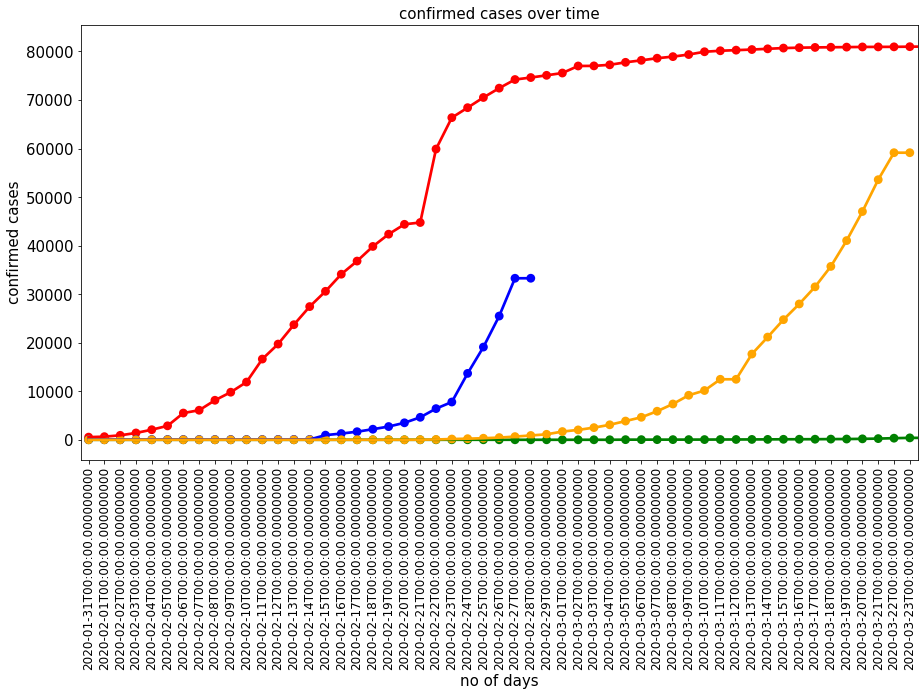

In [91]:
#recovered
plt.figure(figsize=(15,8))
sns.pointplot(china.date,china.confirmed,color="red")
sns.pointplot(india.date,india.confirmed,color="green")
sns.pointplot(us.date,us.confirmed,color="blue")
sns.pointplot(italy.date,italy.confirmed,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("confirmed cases",fontsize=15)
plt.title("confirmed cases over time",fontsize=15)
plt.show()